<a href="https://colab.research.google.com/github/DivyamThapliyal07/Projects/blob/main/SalaryPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df= pd.read_csv("/content/salaries.csv")

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Data Scientist,132600,USD,132600,US,100,US,M
1,2025,MI,FT,Data Scientist,102000,USD,102000,US,100,US,M
2,2025,SE,FT,Data Product Manager,260520,USD,260520,US,0,US,M
3,2025,SE,FT,Data Product Manager,140280,USD,140280,US,0,US,M
4,2025,SE,FT,Machine Learning Engineer,215000,USD,215000,US,0,US,M


In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Data Scientist,132600,USD,132600,US,100,US,M
1,2025,MI,FT,Data Scientist,102000,USD,102000,US,100,US,M
2,2025,SE,FT,Data Product Manager,260520,USD,260520,US,0,US,M
3,2025,SE,FT,Data Product Manager,140280,USD,140280,US,0,US,M
4,2025,SE,FT,Machine Learning Engineer,215000,USD,215000,US,0,US,M


In [ ]:
df=df.drop("salary_currency", axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# prompt: do convert dummies for df

import pandas as pd
# Get list of categorical features
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

# Convert categorical features to dummy variables
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [ ]:
df.head()

,work_year,salary,salary_in_usd,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,...,company_location_TW,company_location_UA,company_location_US,company_location_VE,company_location_VN,company_location_XK,company_location_ZA,company_location_ZM,company_size_M,company_size_S
0,2025,132600,132600,100,False,True,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
1,2025,102000,102000,100,False,True,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
2,2025,260520,260520,0,False,False,True,False,True,False,...,False,False,True,False,False,False,False,False,True,False
3,2025,140280,140280,0,False,False,True,False,True,False,...,False,False,True,False,False,False,False,False,True,False
4,2025,215000,215000,0,False,False,True,False,True,False,...,False,False,True,False,False,False,False,False,True,False


In [ ]:
X= df.drop("salary_in_usd", axis=1)
y= df["salary_in_usd"]

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
LR= LinearRegression()


In [ ]:
LR.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred= LR.predict(X_test)

In [ ]:
residuals= y_test-y_pred

<Axes: xlabel='salary_in_usd', ylabel='Count'>

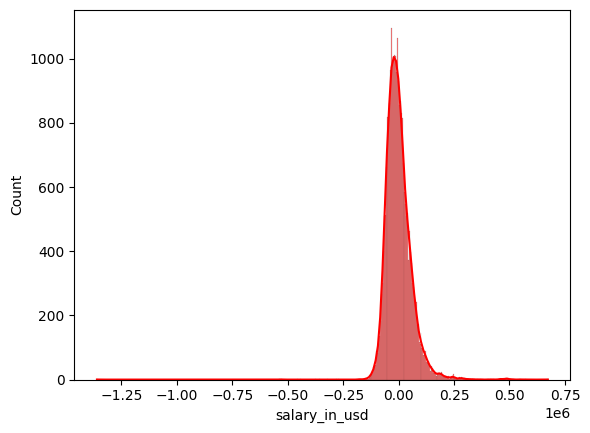

In [ ]:
sns.histplot(residuals, kde= True, color= "red")

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
MAE=mean_absolute_error(y_test, y_pred)

In [ ]:
MAE

41383.45688147362

In [ ]:
r2= r2_score(y_test, y_pred)

In [ ]:
r2

0.3993658078169873

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
models={LinearRegression(), Ridge(), Lasso(), RandomForestRegressor(n_estimators=100, random_state=42), GradientBoostingRegressor(n_estimators=100, random_state=537), AdaBoostRegressor(), ExtraTreesRegressor(n_estimators=100, random_state=537), SVR(), KNeighborsRegressor()}

In [ ]:
for model in models:
  model.fit(X_train, y_train)
  y_pred= model.predict(X_test)
  mae= mean_absolute_error(y_test, y_pred)
  r2= r2_score(y_test, y_pred)
  print(f"Model: {model}, MAE: {mae}, R2: {r2}")

Model: RandomForestRegressor(random_state=42), MAE: 468.77726423298606, R2: 0.9924912714023886
Model: GradientBoostingRegressor(random_state=537), MAE: 1276.4427389181294, R2: 0.9954171767222428
